In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("C:/Users/ABHILASH/Downloads/QVI_transaction_data.xlsx")

In [3]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
df.shape

(264836, 8)

In [5]:
df.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [6]:
missing_data=df.isnull().sum()
missing_data

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [7]:
from datetime import datetime, timedelta
start_date = datetime(1899, 12, 30)  # Change this to your desired starting date
df['DATE'] = start_date + pd.to_timedelta(df['DATE'], unit='D')

# Format the date column as a string in 'YYYY-MM-DD' format
df['DATE'] = df['DATE'].dt.strftime('%Y-%m-%d')

In [8]:
#df['DATE'] = pd.to_datetime(df['DATE'], origin='2019-12-30', unit='D')
#df['DATE']=pd.to_datetime(df['DATE']).dt.date
df['DATE']

0         2018-10-17
1         2019-05-14
2         2019-05-20
3         2018-08-17
4         2018-08-18
             ...    
264831    2019-03-09
264832    2018-08-13
264833    2018-11-06
264834    2018-12-27
264835    2018-09-22
Name: DATE, Length: 264836, dtype: object

In [9]:
print(df.DATE.min())
df.DATE.max()

2018-07-01


'2019-06-30'

In [10]:
df.PROD_NAME.value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [11]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [12]:
df['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [13]:
product_words = df['PROD_NAME'].str.split(expand=True).stack().reset_index(level=0).rename(columns={0: 'words'})

In [14]:
product_words

,level_0,words
0,0,Natural
1,0,Chip
2,0,Compny
3,0,SeaSalt175g
0,1,CCs
...,...,...
0,264835,Tostitos
1,264835,Splash
2,264835,Of
3,264835,Lime


In [15]:
product_words['words'] = product_words['words'].str.replace(r'[^a-zA-Z]', '')

# Filter out empty strings
product_words = product_words[product_words['words'] != '']

# Sort words by frequency of occurrence
word_counts = product_words['words'].value_counts().reset_index()
word_counts.columns = ['words', 'frequency']
word_counts = word_counts.sort_values(by='frequency', ascending=False)

C:\Users\ABHILASH\AppData\Local\Temp\ipykernel_18988\4194265506.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  product_words['words'] = product_words['words'].str.replace(r'[^a-zA-Z]', '')


In [16]:
word_counts

,words,frequency
0,g,246628
1,Chips,49770
2,Kettle,41288
3,Smiths,28860
4,Salt,27976
...,...,...
191,Sunbites,1432
192,Pc,1431
193,Garden,1419
194,NCC,1419


In [17]:
df = df[~df['PROD_NAME'].str.lower().str.contains('salsa', na=False)]

In [18]:
df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai  C

In [19]:
df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [20]:
outlier_transaction = df[df['PROD_QTY'] == 200]


In [21]:
outlier_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [22]:
other_transaction=df[df['LYLTY_CARD_NBR']==226000]
other_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [23]:
df = df[df['LYLTY_CARD_NBR'] != 226000]
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [24]:
transaction_count_by_date = df.groupby('DATE').size().reset_index(name='Transaction_Count')
transaction_count_by_date

,DATE,Transaction_Count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


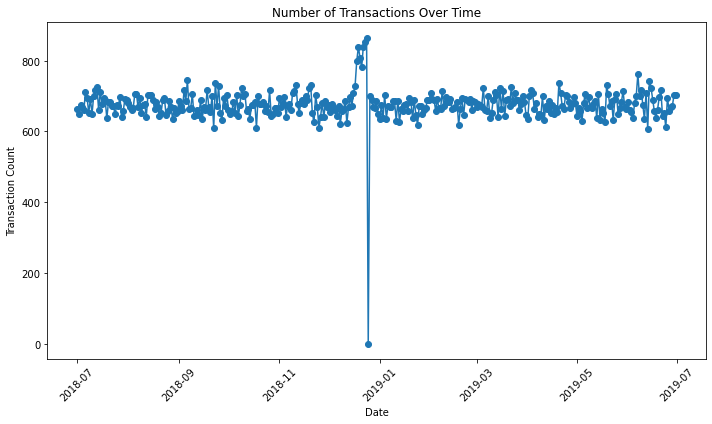

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate a sequence of dates from 1 Jul 2018 to 30 Jun 2019
start_date = pd.to_datetime('2018-07-01')
end_date = pd.to_datetime('2019-06-30')
date_sequence = pd.date_range(start_date, end_date, freq='D')

# Create a DataFrame with the sequence of dates
date_df = pd.DataFrame({'DATE': date_sequence})

# Convert the 'DATE' column in transaction_count_by_date to datetime
transaction_count_by_date['DATE'] = pd.to_datetime(transaction_count_by_date['DATE'])

# Merge the date sequence DataFrame with the transaction count by date
merged_df = pd.merge(date_df, transaction_count_by_date, how='left', on='DATE')

# Fill missing transaction counts with 0
merged_df['Transaction_Count'] = merged_df['Transaction_Count'].fillna(0)

# Plot the number of transactions over time
plt.figure(figsize=(10, 6))
plt.plot(merged_df['DATE'], merged_df['Transaction_Count'], marker='o')
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


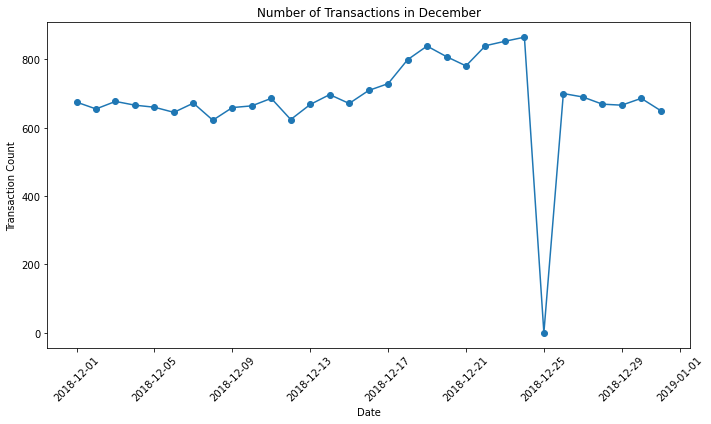

          DATE  Transaction_Count
153 2018-12-01              675.0
154 2018-12-02              655.0
155 2018-12-03              677.0
156 2018-12-04              666.0
157 2018-12-05              660.0
158 2018-12-06              645.0
159 2018-12-07              672.0
160 2018-12-08              622.0
161 2018-12-09              659.0
162 2018-12-10              664.0
163 2018-12-11              686.0
164 2018-12-12              624.0
165 2018-12-13              668.0
166 2018-12-14              697.0
167 2018-12-15              671.0
168 2018-12-16              709.0
169 2018-12-17              729.0
170 2018-12-18              799.0
171 2018-12-19              839.0
172 2018-12-20              808.0
173 2018-12-21              781.0
174 2018-12-22              840.0
175 2018-12-23              853.0
176 2018-12-24              865.0
177 2018-12-25                0.0
178 2018-12-26              700.0
179 2018-12-27              690.0
180 2018-12-28              669.0
181 2018-12-29

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for December
december_data = merged_df[(merged_df['DATE'].dt.month == 12)]

# Plot the number of transactions for December
plt.figure(figsize=(10, 6))
plt.plot(december_data['DATE'], december_data['Transaction_Count'], marker='o')
plt.title('Number of Transactions in December')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(december_data)


In [27]:
df['PACK_SIZE']=df['PROD_NAME'].str.extract('(\d+)',expand=False).astype(float)
pack_size_counts = df['PACK_SIZE'].value_counts().sort_index()
print((pack_size_counts))

70.0      1507
90.0      3008
110.0    22387
125.0     1454
134.0    25102
135.0     3257
150.0    40203
160.0     2970
165.0    15297
170.0    19983
175.0    66390
180.0     1468
190.0     2995
200.0     4473
210.0     6272
220.0     1564
250.0     3169
270.0     6285
330.0    12540
380.0     6416
Name: PACK_SIZE, dtype: int64


<AxesSubplot:>

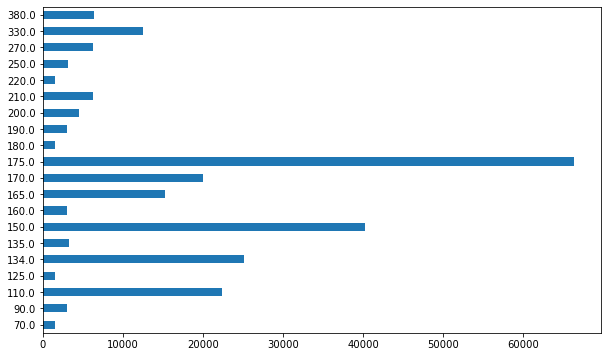

In [28]:
pack_size_counts.plot.barh(figsize =(10,6),rot=0)

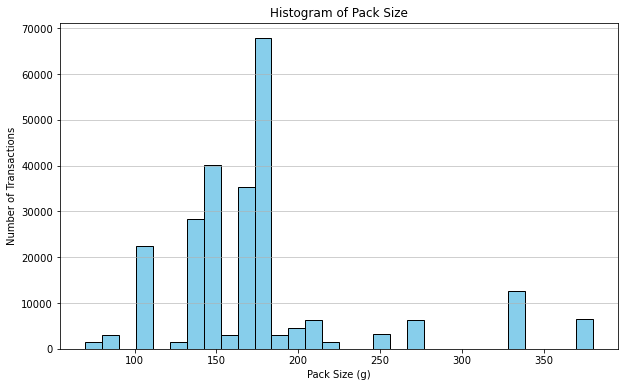

In [29]:
import matplotlib.pyplot as plt

plt.hist(df['PACK_SIZE'],bins=30,color='skyblue', edgecolor='black')
plt.title('Histogram of Pack Size')
plt.xlabel('Pack Size (g)')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [30]:

df['BRAND'] = df['PROD_NAME'].str.split().str[0]

# Checking brands
# Display unique values to inspect the extracted brand names
print(df['BRAND'].unique())



['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'French' 'RRD' 'Tostitos'
 'Cheetos' 'Woolworths' 'Snbts' 'Sunbites']


In [31]:
# Clean brand names
df['BRAND'] = df['BRAND'].replace({'Red': 'RRD','WW':'Woolworths','Grain':'GrnWves','Smiths' : 'Smith','Infzns':'Infuzions','Snbts':'Sunbites','Doritos':'Dorito','Natural':'NCC'})

# Display unique values to verify the cleaned brand names
print(df['BRAND'].unique())

['NCC' 'CCs' 'Smith' 'Kettle' 'GrnWves' 'Dorito' 'Twisties' 'Woolworths'
 'Thins' 'Burger' 'Cheezels' 'Infuzions' 'RRD' 'Pringles' 'Tyrrells'
 'Cobs' 'French' 'Tostitos' 'Cheetos' 'Sunbites']


<AxesSubplot:>

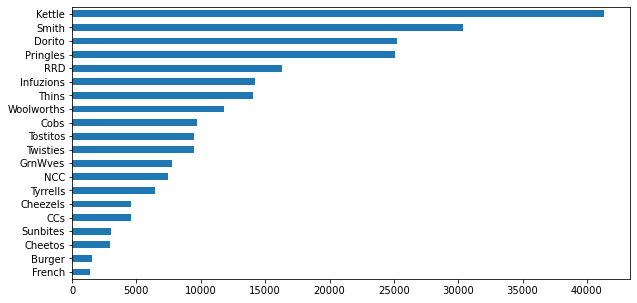

In [32]:
df['BRAND'].value_counts(ascending=True).plot.barh(figsize=(10,5))

In [33]:
df2 = pd.read_csv("C:/Users/ABHILASH/Downloads/QVI_purchase_behaviour.csv")
df2

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


AxesSubplot(0.125,0.125;0.775x0.755)


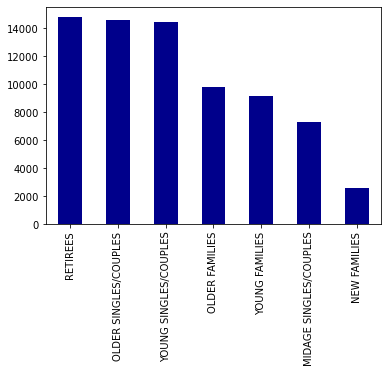

In [34]:
x=df2['LIFESTAGE'].value_counts().plot(kind='bar',color='darkblue')
print(x)

In [35]:
df2.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count().sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES   Mainstream          8088
RETIREES                Mainstream          6479
OLDER SINGLES/COUPLES   Mainstream          4930
                        Budget              4929
                        Premium             4750
OLDER FAMILIES          Budget              4675
RETIREES                Budget              4454
YOUNG FAMILIES          Budget              4017
RETIREES                Premium             3872
YOUNG SINGLES/COUPLES   Budget              3779
MIDAGE SINGLES/COUPLES  Mainstream          3340
OLDER FAMILIES          Mainstream          2831
YOUNG FAMILIES          Mainstream          2728
YOUNG SINGLES/COUPLES   Premium             2574
YOUNG FAMILIES          Premium             2433
MIDAGE SINGLES/COUPLES  Premium             2431
OLDER FAMILIES          Premium             2274
MIDAGE SINGLES/COUPLES  Budget              1504
NEW FAMILIES            Budget              1112
                        Main

In [36]:
final_df= pd.merge(df,df2, how='left',on='LYLTY_CARD_NBR')

In [37]:
final_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NCC,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smith,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smith,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,Tostitos,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,Dorito,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Dorito,YOUNG SINGLES/COUPLES,Premium


In [38]:
# checking if any transaction did not have a matched customer
miss=final_df[final_df['LYLTY_CARD_NBR'].isnull()]
print(miss)

Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, PACK_SIZE, BRAND, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []


In [39]:
final_df.to_csv('C:/Users/ABHILASH/Downloads/QVI_data.csv')

In [40]:
total_sales= final_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum().sort_values(ascending=False)
total_sales

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Budget              156863.75
YOUNG SINGLES/COUPLES   Mainstream          147582.20
RETIREES                Mainstream          145168.95
YOUNG FAMILIES          Budget              129717.95
OLDER SINGLES/COUPLES   Budget              127833.60
                        Mainstream          124648.50
                        Premium             123537.55
RETIREES                Budget              105916.30
OLDER FAMILIES          Mainstream           96413.55
RETIREES                Premium              91296.65
YOUNG FAMILIES          Mainstream           86338.25
MIDAGE SINGLES/COUPLES  Mainstream           84734.25
YOUNG FAMILIES          Premium              78571.70
OLDER FAMILIES          Premium              75242.60
YOUNG SINGLES/COUPLES   Budget               57122.10
MIDAGE SINGLES/COUPLES  Premium              54443.85
YOUNG SINGLES/COUPLES   Premium              39052.30
MIDAGE SINGLES/COUPLES  Budget           

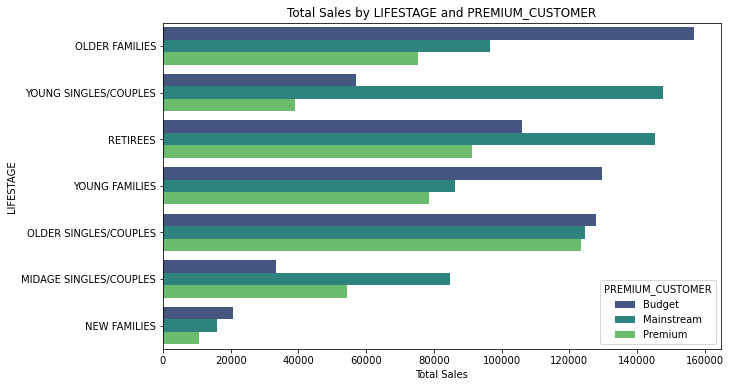

In [41]:
# Spending by customers by lifestage and how premium their purchasing behaviour was -
total_sales= final_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum().sort_values(ascending=False).reset_index()

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='TOT_SALES', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=total_sales, ci=None, palette='viridis')
plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Total Sales')
plt.ylabel('LIFESTAGE')
plt.show()

Older families spend more on budget friendly chips.
Young singles/couples & Retirees spend more in mainstream chips than others.

In [42]:
# Customers in each segment
customers_in_segment=final_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique().sort_values(ascending=False).reset_index()
customers_in_segment=final_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique().sort_values(ascending=False)
pd.DataFrame(customers_in_segment)

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream                  7917
RETIREES               Mainstream                  6358
OLDER SINGLES/COUPLES  Mainstream                  4858
                       Budget                      4849
                       Premium                     4682
OLDER FAMILIES         Budget                      4611
RETIREES               Budget                      4385
YOUNG FAMILIES         Budget                      3953
RETIREES               Premium                     3812
YOUNG SINGLES/COUPLES  Budget                      3647
MIDAGE SINGLES/COUPLES Mainstream                  3298
OLDER FAMILIES         Mainstream                  2788
YOUNG FAMILIES         Mainstream                  2685
YOUNG SINGLES/COUPLES  Premium                     2480
YOUNG FAMILIES         Premium                     2398
MIDAGE SINGLES/COUPLES Premium                     2369
OLDER FAMILIES         Premium                     2231
MIDAGE SINGLES/COUPLES Budget                      1474
NEW FAMILIES           Budget                      1087
                       Mainstream                   830
                       Premium                      575

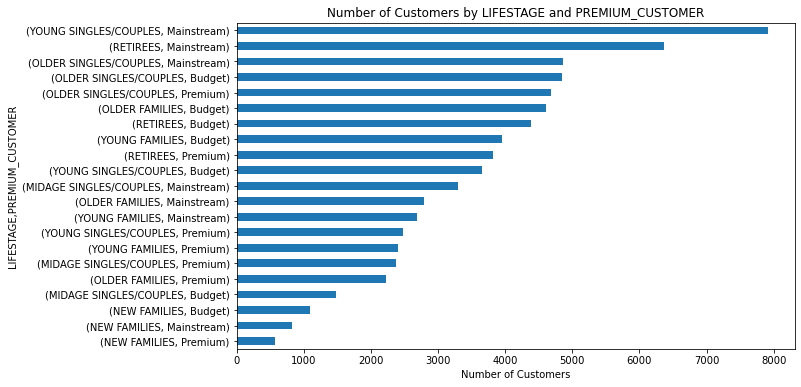

In [43]:
customers_in_segment.sort_values().plot.barh(figsize=(10, 6))

plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Number of Customers')
plt.show()

In [44]:
# Average number of chips brought by customer segment
average_no_chips=final_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum().reset_index()
average_no_chips=final_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum()
no_chips_by_customers = pd.DataFrame((average_no_chips/final_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique()).sort_values(ascending=False))
no_chips_by_customers

0
LIFESTAGE              PREMIUM_CUSTOMER          
OLDER FAMILIES         Mainstream        9.255380
                       Budget            9.076773
                       Premium           9.071717
YOUNG FAMILIES         Budget            8.722995
                       Premium           8.716013
                       Mainstream        8.638361
OLDER SINGLES/COUPLES  Budget            6.781398
                       Premium           6.769543
                       Mainstream        6.712021
MIDAGE SINGLES/COUPLES Mainstream        6.432080
RETIREES               Budget            6.141847
                       Premium           6.103358
MIDAGE SINGLES/COUPLES Premium           6.078514
                       Budget            6.026459
RETIREES               Mainstream        5.925920
NEW FAMILIES           Mainstream        4.891566
                       Budget            4.821527
                       Premium           4.815652
YOUNG SINGLES/COUPLES  Mainstream        4.575597
                       Premium           4.264113
                       Budget            4.250069

<AxesSubplot:ylabel='LIFESTAGE'>

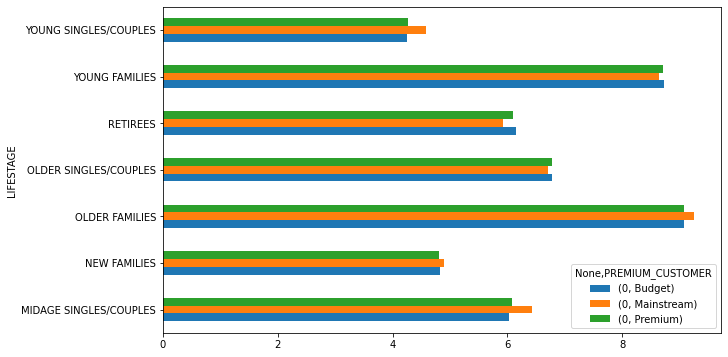

In [45]:
no_chips_by_customers.unstack().plot.barh(figsize=(10, 6),rot=0)


# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

LIFESTAGE               PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES   Mainstream          4.074043
MIDAGE SINGLES/COUPLES  Mainstream          3.994449
NEW FAMILIES            Mainstream          3.935887
RETIREES                Budget              3.932731
NEW FAMILIES            Budget              3.931969
RETIREES                Premium             3.924037
OLDER SINGLES/COUPLES   Premium             3.897698
                        Budget              3.887529
NEW FAMILIES            Premium             3.886168
RETIREES                Mainstream          3.852986
OLDER SINGLES/COUPLES   Mainstream          3.822753
MIDAGE SINGLES/COUPLES  Premium             3.780823
YOUNG FAMILIES          Budget              3.761903
                        Premium             3.759232
MIDAGE SINGLES/COUPLES  Budget              3.753878
OLDER FAMILIES          Budget              3.747969
                        Mainstream          3.736380
YOUNG FAMILIES          Mainstream          3.722439
OLDER

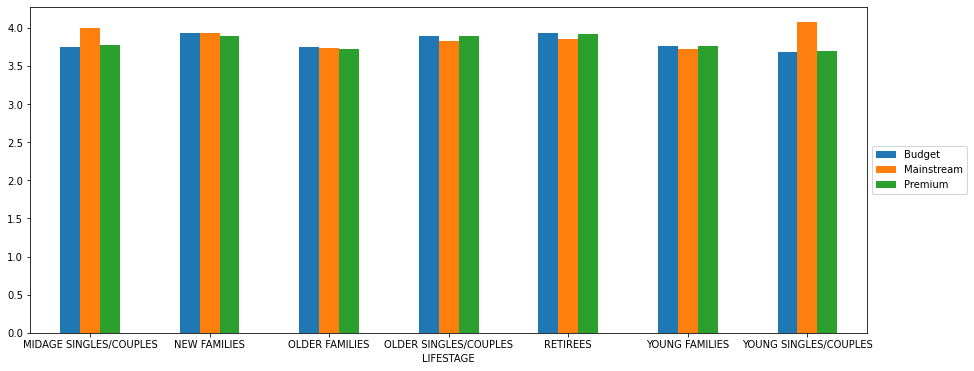

In [46]:
# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price_per_unit = final_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()/final_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()

print(avg_price_per_unit.sort_values(ascending=False))

avg_price_per_unit.unstack().plot.bar(figsize=(15, 6),rot=0)
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))


In [47]:
from scipy.stats import ttest_ind

In [48]:
final_df['CUSTOMER_SEGMENT'] = 'Mainstream'
final_df.loc[final_df['PREMIUM_CUSTOMER'].isin(['Premium', 'Budget']), 'CUSTOMER_SEGMENT'] = 'Premium/Budget'

# Extract data for the two groups
mainstream_data = final_df[(final_df['CUSTOMER_SEGMENT'] == 'Mainstream') & (final_df['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES']))]
premium_budget_data = final_df[(final_df['CUSTOMER_SEGMENT'] == 'Premium/Budget') & (final_df['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES']))]

column_to_compare = 'TOT_SALES'

# Perform an independent t-test
t_statistic, p_value = ttest_ind(mainstream_data[column_to_compare], premium_budget_data[column_to_compare])

# Display the results
print(f"t-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Check for significance
alpha = 0.05
if p_value < alpha:
    print("The unit price for mainstream, young and mid-age singles and couples is significantly higher than that of budget or premium.")
else:
    print("There is no significant difference in unit price between the groups.")

t-Statistic: 33.200521751400586
P-Value: 1.9916804791117584e-239
The unit price for mainstream, young and mid-age singles and couples is significantly higher than that of budget or premium.


In [49]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

temp = final_df.reset_index().rename(columns = {"index" : "transaction"})
temp["Segment"] = temp["LIFESTAGE"] + ' - ' + temp["PREMIUM_CUSTOMER"]
segment_brand_encode = pd.concat([pd.get_dummies(temp['Segment']), pd.get_dummies(temp['BRAND'])], axis=1)

frequent_itemsets = apriori(segment_brand_encode, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

set_temp = temp["Segment"].unique()
rules[rules['antecedents'].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]


C:\Users\ABHILASH\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(OLDER FAMILIES - Budget),(Smith),0.087193,0.123016,0.011948,0.137027,1.113895,0.001222,1.016236,0.112016
2,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.069596,0.167334,0.012422,0.178488,1.066658,0.000776,1.013578,0.067167
5,(OLDER SINGLES/COUPLES - Premium),(Kettle),0.067115,0.167334,0.011944,0.177959,1.063495,0.000713,1.012925,0.064000
6,(RETIREES - Budget),(Kettle),0.057652,0.167334,0.010505,0.182214,1.088926,0.000858,1.018196,0.086660
9,(RETIREES - Mainstream),(Kettle),0.080935,0.167334,0.013723,0.169554,1.013269,0.000180,1.002674,0.014248
10,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.079209,0.167334,0.015579,0.196684,1.175400,0.002325,1.036537,0.162062


========== YOUNG SINGLES/COUPLES - Premium ==========
134.0     537
150.0     933
175.0    1618
Name: PACK_SIZE, dtype: int64


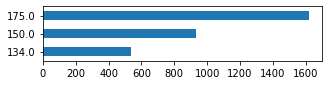

========== YOUNG SINGLES/COUPLES - Budget ==========
134.0     832
150.0    1390
175.0    2338
Name: PACK_SIZE, dtype: int64


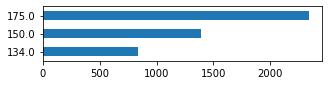

========== YOUNG SINGLES/COUPLES - Mainstream ==========
134.0    2315
150.0    3080
175.0    4997
Name: PACK_SIZE, dtype: int64


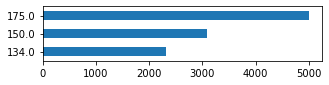

========== MIDAGE SINGLES/COUPLES - Premium ==========
134.0     781
150.0    1207
175.0    2082
Name: PACK_SIZE, dtype: int64


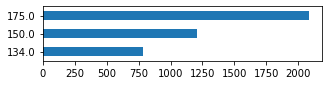

========== MIDAGE SINGLES/COUPLES - Budget ==========
134.0     449
150.0     771
175.0    1277
Name: PACK_SIZE, dtype: int64


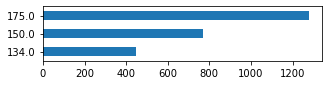

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
134.0    1159
150.0    1777
175.0    2975
Name: PACK_SIZE, dtype: int64


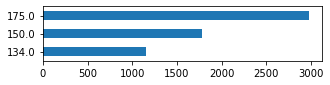

========== NEW FAMILIES - Premium ==========
134.0    165
150.0    233
175.0    376
Name: PACK_SIZE, dtype: int64


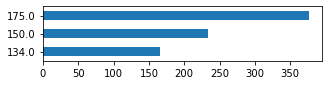

========== NEW FAMILIES - Budget ==========
134.0    309
150.0    440
175.0    777
Name: PACK_SIZE, dtype: int64


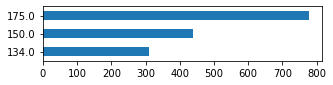

========== NEW FAMILIES - Mainstream ==========
134.0    224
150.0    374
175.0    589
Name: PACK_SIZE, dtype: int64


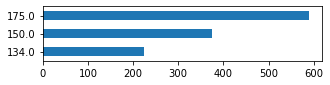

========== OLDER FAMILIES - Premium ==========
134.0    1014
150.0    1673
175.0    2816
Name: PACK_SIZE, dtype: int64


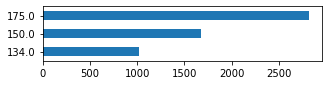

========== OLDER FAMILIES - Budget ==========
134.0    1996
150.0    3588
175.0    5808
Name: PACK_SIZE, dtype: int64


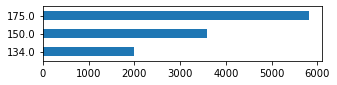

========== OLDER FAMILIES - Mainstream ==========
134.0    1234
150.0    2189
175.0    3588
Name: PACK_SIZE, dtype: int64


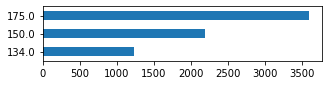

========== OLDER SINGLES/COUPLES - Premium ==========
134.0    1744
150.0    2768
175.0    4458
Name: PACK_SIZE, dtype: int64


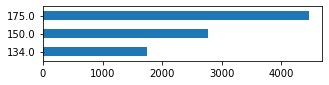

========== OLDER SINGLES/COUPLES - Budget ==========
134.0    1843
150.0    2811
175.0    4625
Name: PACK_SIZE, dtype: int64


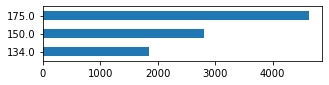

========== OLDER SINGLES/COUPLES - Mainstream ==========
134.0    1720
150.0    2773
175.0    4525
Name: PACK_SIZE, dtype: int64


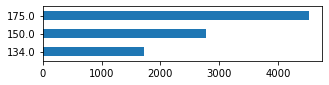

========== RETIREES - Premium ==========
134.0    1331
150.0    1943
175.0    3306
Name: PACK_SIZE, dtype: int64


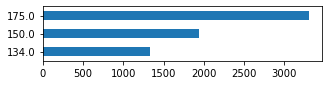

========== RETIREES - Budget ==========
134.0    1517
150.0    2319
175.0    3847
Name: PACK_SIZE, dtype: int64


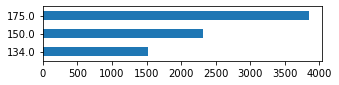

========== RETIREES - Mainstream ==========
134.0    2103
150.0    3290
175.0    5295
Name: PACK_SIZE, dtype: int64


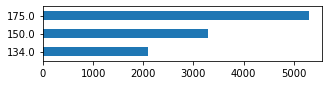

========== YOUNG FAMILIES - Premium ==========
134.0    1007
150.0    1778
175.0    2998
Name: PACK_SIZE, dtype: int64


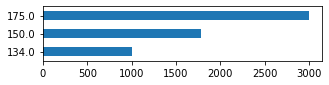

========== YOUNG FAMILIES - Budget ==========
134.0    1674
150.0    2862
175.0    4921
Name: PACK_SIZE, dtype: int64


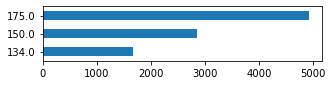

========== YOUNG FAMILIES - Mainstream ==========
134.0    1148
150.0    2004
175.0    3174
Name: PACK_SIZE, dtype: int64


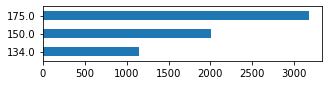

In [50]:


for stage in final_df["LIFESTAGE"].unique():
    for prem in final_df["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', prem,'==========')
        summary = final_df[(final_df["LIFESTAGE"] == stage) & (final_df["PREMIUM_CUSTOMER"] == prem)]["PACK_SIZE"].value_counts().head(3).sort_index()
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()
     

Insights :

1. Top 3 customers by lifestage and purchasing behaviour contributes to highest sales are 

•	OLDER FAMILIES - Budget  $ 156863.75

•	YOUNG SINGLES/COUPLES - Mainstream   $ 147582.20

•	RETIREES - Mainstream  $ 145168.95.

The sales contribution can be from number of customers in those segments or frequency of purchases than other segments or higher price per unit.

2.Segments which have higher frequency of purchases are : OLDER FAMILIES and YOUNG FAMILIES. Older families has higher frequency   of purchases, Older Families contribute total higher sales.

3.By analysing the results, Young singles/couples have higher number of customers than Retirees and Older Families which           contribute to higher sales.

5.Kettle brand chips are most purchased brand chips by every segment.

6.Every customer segment mostly preferred packsize of 175 g followed by 150 g.

7.Older families and Young families have higher frequency of purchases.

8.Mainstream Young singles/couples and Midage singles/couples spend more on each packet of chips than premium and budget. As there isn't large difference in average price per unit, t-test is conducted to determine if is there any statistical significance. After observing the p-value, the unit price for mainstream Young and Mid-age singles and couples is significantly higher than that of budget or premium.



Business Recommendations :
1. Focus on top customer segments by promoting and attracting customers from 'Older Families - Budget', 'Young Singles/Couples -    Mainstream' and 'Retirees - Mainstream'
2. Targeting the high frequency of purchases customer segments (Older Families & Young Families) by developing marketing            strategy like personalised offers or discounts to encourage them repeat purchases.
3. Higher number of customers are present in Young singles/couples, target these customers by marketing the chips are organic      who focus alot on health.
4. Considering pricing strategy that allows customer preferences and willing to pay in Young singles/couples and Midage            singles/couples - Budget and Premium segements.
5. Advertising more on Kettle brand can increase the sales. And optimizing inventory as most purchases are of 175g and 150g        sizes.